## Preprocessing and Training

In our previous notebook we used PCA analysis to reduce the deminsionality of our stock_price dataset and found that 3 components explains 94% of the variance of the data. 

Now that we have a good estimation of the overall health of Cryptocurrencies(mimic CCI30 index), lets take a look if Google trend search results historically affect Cryptocurrency price and in future notebook, see if it can predict CCCI30 price. 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#load google trends dataset

gtrends = pd.read_csv('./Data/GoogleTrendsTimeline-BitcoinCryptocurrency.csv')

In [46]:
gtrends

,Week,Bitcoin: (United States),Cryptocurrency: (United States)
0,8/7/2016,2,<1
1,8/14/2016,2,<1
2,8/21/2016,2,<1
3,8/28/2016,2,<1
4,9/4/2016,2,<1
...,...,...,...
256,7/4/2021,13,6
257,7/11/2021,13,6
258,7/18/2021,15,6
259,7/25/2021,18,6


In [47]:
gtrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Week                             261 non-null    object
 1   Bitcoin: (United States)         261 non-null    int64 
 2   Cryptocurrency: (United States)  261 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.2+ KB


In [48]:
gtrends.columns = ['Week', 'Bitcoin', 'Cryptocurrency']

In [49]:
gtrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Week            261 non-null    object
 1   Bitcoin         261 non-null    int64 
 2   Cryptocurrency  261 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.2+ KB


Cryptocurrency is a object. We need to clean the data and turn it into an int64 column type

In [52]:
#replace all instances of '<1' in the cryptocurrency column with 0

gtrends= gtrends.replace('<1',0)

gtrends['Cryptocurrency'] = pd.to_numeric(gtrends['Cryptocurrency'])
gtrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Week            261 non-null    object
 1   Bitcoin         261 non-null    int64 
 2   Cryptocurrency  261 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.2+ KB


C:\Users\kenne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Week'>

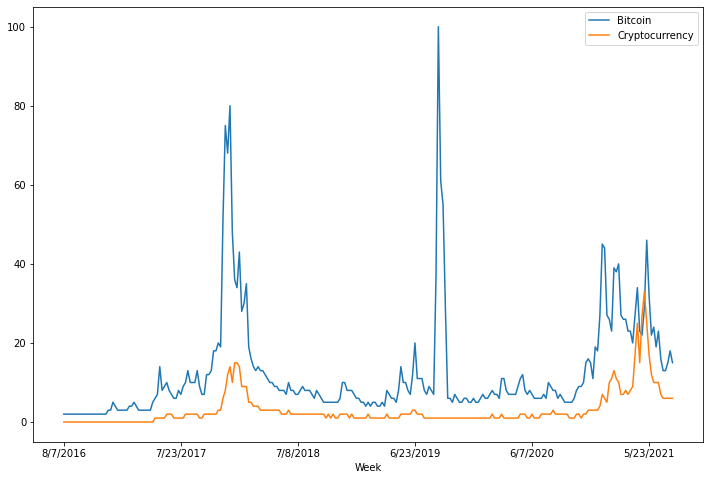

In [67]:
gtrends.plot(y = ['Bitcoin', 'Cryptocurrency'], x = 'Week', figsize=(12, 8))

In [59]:
stock_prices = pd.read_csv('./Data/Yahoo_Stock_Prices_Cleaned.csv')

C:\Users\kenne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

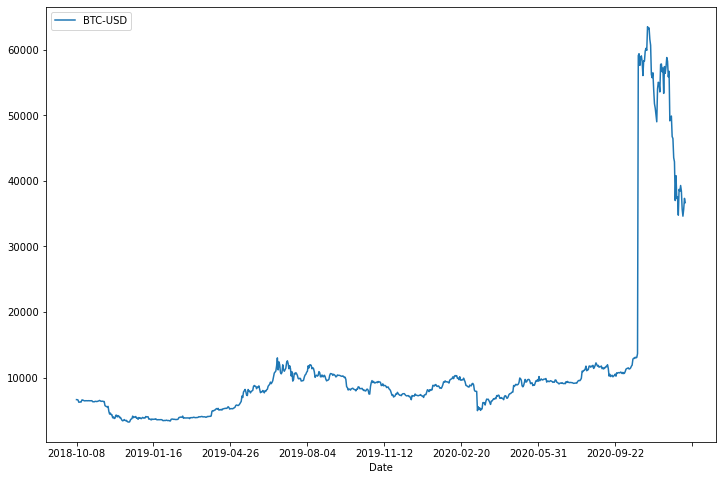

In [66]:
stock_prices.plot(x = 'Date', y = 'BTC-USD', figsize = (12,8))

Looks like both graphs share a peak around late 2020/early 2021. The google search trend for Bitcoin has a peak popularity of 100 around August 2019. 

This peak is not present in any of the other graphs